<a href="https://colab.research.google.com/github/Alaaomar9/Fake-News-Detection-/blob/main/fake_news_detection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#!pip install --upgrade tensorflow

In [41]:
!pip install plotly
!pip install tensorflow
!pip install --upgrade nbformat
!pip install Keras-Preprocessing
!pip install nltk
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install jupyterthemes


import tensorflow as tf
import pandas as pd
import numpy as np
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
import re

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, Input,LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
df_true = pd.read_csv("/True.csv")
df_fake = pd.read_csv("/Fake.csv")

In [43]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [44]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [45]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [46]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [47]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [48]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [49]:
df_fake["Label"] = "Fake"
df_true["Label"] = "True"

In [50]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [51]:
df = df.sample(frac=1).reset_index(drop=True)

<Axes: xlabel='count', ylabel='subject'>

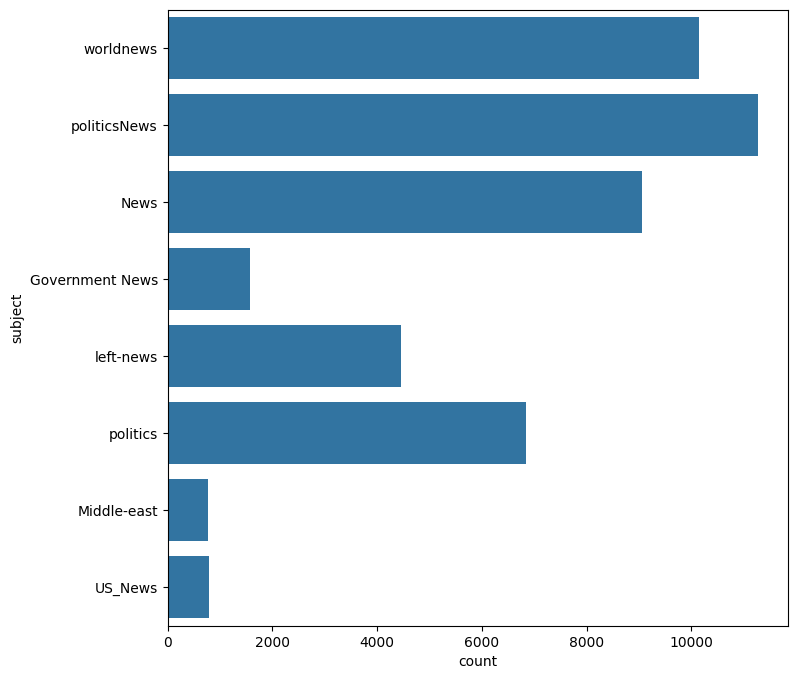

In [52]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

In [53]:
df.drop(columns = ['date'], inplace = True)
df

,title,text,subject,Label
0,UAE says fully supports new U.S. policy agains...,DUBAI (Reuters) - The United Arab Emirates sai...,worldnews,True
1,"Climate change should not be 'partisan issue,'...","CAMBRIDGE, Mass. (Reuters) - Work to avert the...",politicsNews,True
2,"China's Xi says study capitalism, but Marxism ...",BEIJING (Reuters) - Communist Party members sh...,worldnews,True
3,GOP’s Stunning Reactions To Trump’s Remarks O...,"As the GOP presidential nominee, Republicans h...",News,Fake
4,Officials Caught Falsifying Records To Deny F...,Poverty is a problem in America. While most of...,News,Fake
...,...,...,...,...
44893,Christmas market opens in Algerian capital,ALGIERS (Reuters) - A small Christmas market h...,worldnews,True
44894,"PRO ABORTION PAC, Emily’s List Doing Its Part ...",Of course Emily s List is going to support Hil...,left-news,Fake
44895,HA! YOU WON’T BELIEVE HILLARY’S LUXURY “SCOOBY...,Everyone s been asking where the Hillary van i...,Government News,Fake
44896,Beyonce’s Super Bowl Performance Had An Impor...,Beyonce is one of the most sought-after perfor...,News,Fake


In [54]:
sub_tf_df=df.groupby('Label').apply(lambda x:x['title'].count()).reset_index(name='Counts')
sub_tf_df.Label.replace({0:'False',1:'True'},inplace=True)
sub_tf_df

,Label,Counts
0,Fake,23481
1,True,21417


In [55]:
fig = px.bar(sub_tf_df, x="Label", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

In [56]:
df["text"] = df["title"]+df["text"]

In [57]:
df['Label'] = df['Label'].map({'True':1, 'Fake':0})

In [58]:
df.sample(5)

,title,text,subject,Label
38207,"Spicer Confuses Marijuana With Opioids, Vows ...","Spicer Confuses Marijuana With Opioids, Vows ...",News,0
26785,Trump loves 'the poorly educated' ... and soci...,Trump loves 'the poorly educated' ... and soci...,politicsNews,1
17228,Nixon Historian Says Donald Trump Is More Pet...,Nixon Historian Says Donald Trump Is More Pet...,News,0
6468,Justice Department affirms no evidence Obama w...,Justice Department affirms no evidence Obama w...,politicsNews,1
24860,BREAKING: ISIS May Have Stolen Passport Machin...,BREAKING: ISIS May Have Stolen Passport Machin...,politics,0


In [59]:
df.Label[9943]

1

In [60]:
df.text[36709]

'BAIL DENIED: CONVICTED MUSLIM RAPIST Refuses Mandatory Sex Offender Course Because It “conflicts with [his] Islamic faith”Apparently, keeping a slave and repeatedly raping her is not against his Islamic faith From International Business Times:A Saudi national who was convicted of keeping his Indonesian maid as a sex slave has refused to attend a mandatory sex offender s course, arguing that his Muslim beliefs do not allow him to look at pictures of scantily-clad women.Homaidan al-Turki, 45, was jailed for 28 years in 2006 after his maid claimed she had been forced to work 12 hour days with no break and then locked in a cellar and abused regularly by the Saudi, who was in the US on an academic scholarship with his wife and five children.Al-Turki s sentence was reduced in 2011 to eight years-to-life but his parole applications have been repeatedly denied because of his refusal to attend a sex offenders course.Al-Turki told prison officials in 2013 that the sex offender treatment program

In [61]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [63]:
# Apply the function to the dataframe
df['clean'] = df['text'].apply(preprocess)
# Show original news
df['text'][0]

'UAE says fully supports new U.S. policy against IranDUBAI (Reuters) - The United Arab Emirates said on Friday it fully supported the new U.S. policy toward Iran and it renewed its commitment to work with Washington to counter Iran s support of extremism, the state news agency WAM reported.  The UAE announces its full support to the new U.S. strategy to deal with the Iranian policies undermining security and stability,  WAM said on its twitter account. Bahrain has also announced it welcomed the shift in U.S. policy on Iran s nuclear and ballistic missile programs and its support for extremist groups in the Middle East.  '

In [64]:
print(df['clean'][0])

['says', 'fully', 'supports', 'policy', 'irandubai', 'reuters', 'united', 'arab', 'emirates', 'said', 'friday', 'fully', 'supported', 'policy', 'iran', 'renewed', 'commitment', 'work', 'washington', 'counter', 'iran', 'support', 'extremism', 'state', 'news', 'agency', 'reported', 'announces', 'support', 'strategy', 'deal', 'iranian', 'policies', 'undermining', 'security', 'stability', 'said', 'twitter', 'account', 'bahrain', 'announced', 'welcomed', 'shift', 'policy', 'iran', 'nuclear', 'ballistic', 'missile', 'programs', 'support', 'extremist', 'groups', 'middle', 'east']


In [65]:
df

,title,text,subject,Label,clean
0,UAE says fully supports new U.S. policy agains...,UAE says fully supports new U.S. policy agains...,worldnews,1,"[says, fully, supports, policy, irandubai, reu..."
1,"Climate change should not be 'partisan issue,'...","Climate change should not be 'partisan issue,'...",politicsNews,1,"[climate, change, partisan, issue, kerry, says..."
2,"China's Xi says study capitalism, but Marxism ...","China's Xi says study capitalism, but Marxism ...",worldnews,1,"[china, says, study, capitalism, marxism, rema..."
3,GOP’s Stunning Reactions To Trump’s Remarks O...,GOP’s Stunning Reactions To Trump’s Remarks O...,News,0,"[stunning, reactions, trump, remarks, orlando,..."
4,Officials Caught Falsifying Records To Deny F...,Officials Caught Falsifying Records To Deny F...,News,0,"[officials, caught, falsifying, records, deny,..."
...,...,...,...,...,...
44893,Christmas market opens in Algerian capital,Christmas market opens in Algerian capitalALGI...,worldnews,1,"[christmas, market, opens, algerian, capitalal..."
44894,"PRO ABORTION PAC, Emily’s List Doing Its Part ...","PRO ABORTION PAC, Emily’s List Doing Its Part ...",left-news,0,"[abortion, emily, list, minority, population, ..."
44895,HA! YOU WON’T BELIEVE HILLARY’S LUXURY “SCOOBY...,HA! YOU WON’T BELIEVE HILLARY’S LUXURY “SCOOBY...,Government News,0,"[believe, hillary, luxury, scooby, asking, hil..."
44896,Beyonce’s Super Bowl Performance Had An Impor...,Beyonce’s Super Bowl Performance Had An Impor...,News,0,"[beyonce, super, bowl, performance, important,..."


In [66]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [67]:
total_words = len(list(set(list_of_words)))
total_words

122995

In [68]:
df['final_news'] = df['clean'].apply(lambda x: " ".join(x))
df

,title,text,subject,Label,clean,final_news
0,UAE says fully supports new U.S. policy agains...,UAE says fully supports new U.S. policy agains...,worldnews,1,"[says, fully, supports, policy, irandubai, reu...",says fully supports policy irandubai reuters u...
1,"Climate change should not be 'partisan issue,'...","Climate change should not be 'partisan issue,'...",politicsNews,1,"[climate, change, partisan, issue, kerry, says...",climate change partisan issue kerry sayscambri...
2,"China's Xi says study capitalism, but Marxism ...","China's Xi says study capitalism, but Marxism ...",worldnews,1,"[china, says, study, capitalism, marxism, rema...",china says study capitalism marxism remains to...
3,GOP’s Stunning Reactions To Trump’s Remarks O...,GOP’s Stunning Reactions To Trump’s Remarks O...,News,0,"[stunning, reactions, trump, remarks, orlando,...",stunning reactions trump remarks orlando elect...
4,Officials Caught Falsifying Records To Deny F...,Officials Caught Falsifying Records To Deny F...,News,0,"[officials, caught, falsifying, records, deny,...",officials caught falsifying records deny food ...
...,...,...,...,...,...,...
44893,Christmas market opens in Algerian capital,Christmas market opens in Algerian capitalALGI...,worldnews,1,"[christmas, market, opens, algerian, capitalal...",christmas market opens algerian capitalalgiers...
44894,"PRO ABORTION PAC, Emily’s List Doing Its Part ...","PRO ABORTION PAC, Emily’s List Doing Its Part ...",left-news,0,"[abortion, emily, list, minority, population, ...",abortion emily list minority population check ...
44895,HA! YOU WON’T BELIEVE HILLARY’S LUXURY “SCOOBY...,HA! YOU WON’T BELIEVE HILLARY’S LUXURY “SCOOBY...,Government News,0,"[believe, hillary, luxury, scooby, asking, hil...",believe hillary luxury scooby asking hillary h...
44896,Beyonce’s Super Bowl Performance Had An Impor...,Beyonce’s Super Bowl Performance Had An Impor...,News,0,"[beyonce, super, bowl, performance, important,...",beyonce super bowl performance important hidde...


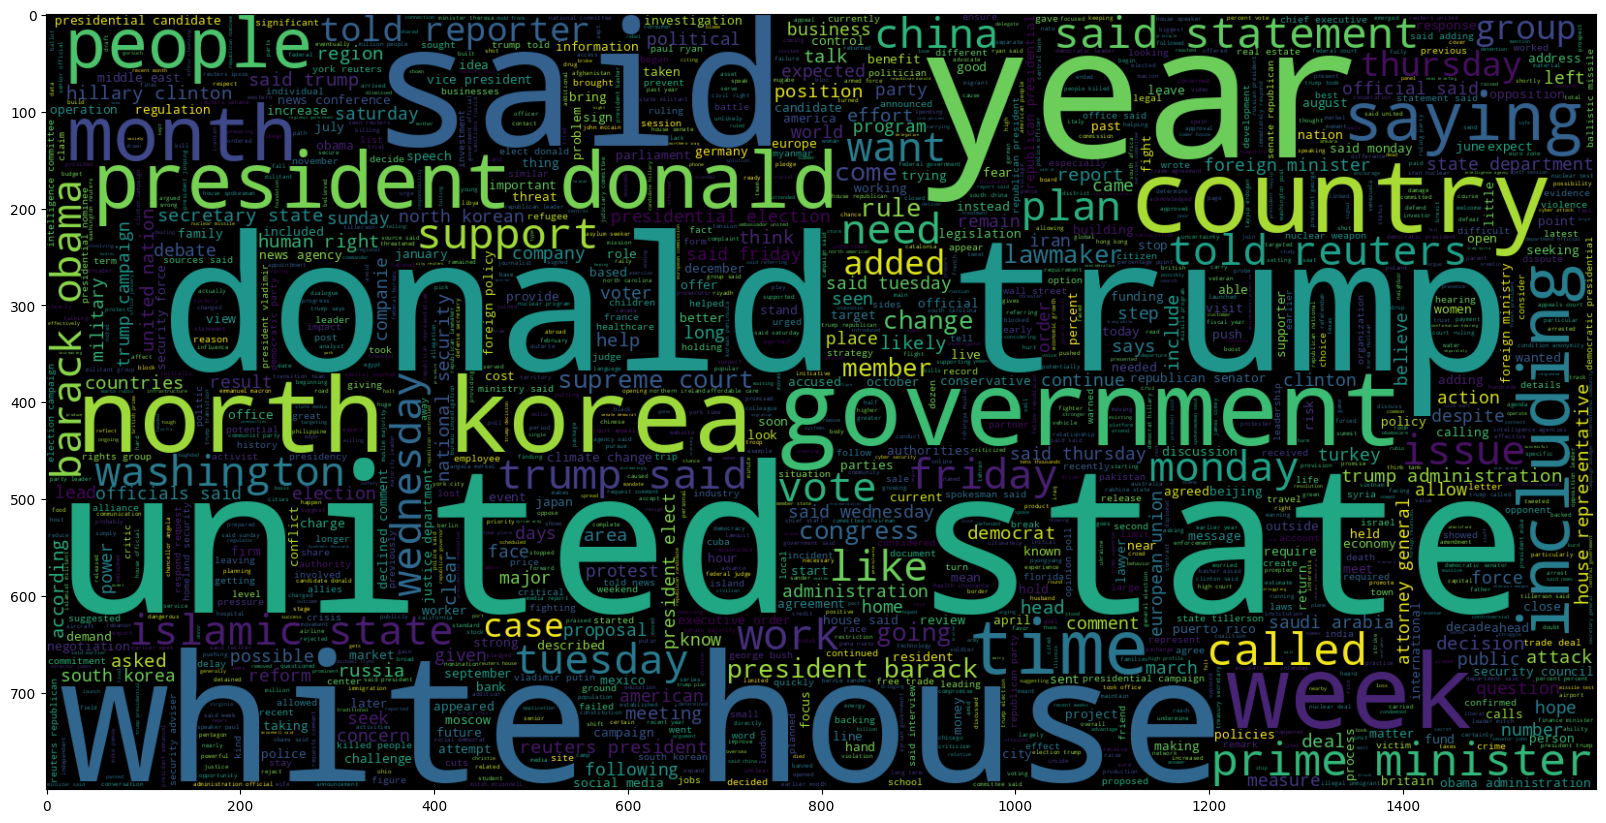

In [69]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.Label	 == 1].final_news))
plt.imshow(wc, interpolation = 'bilinear')

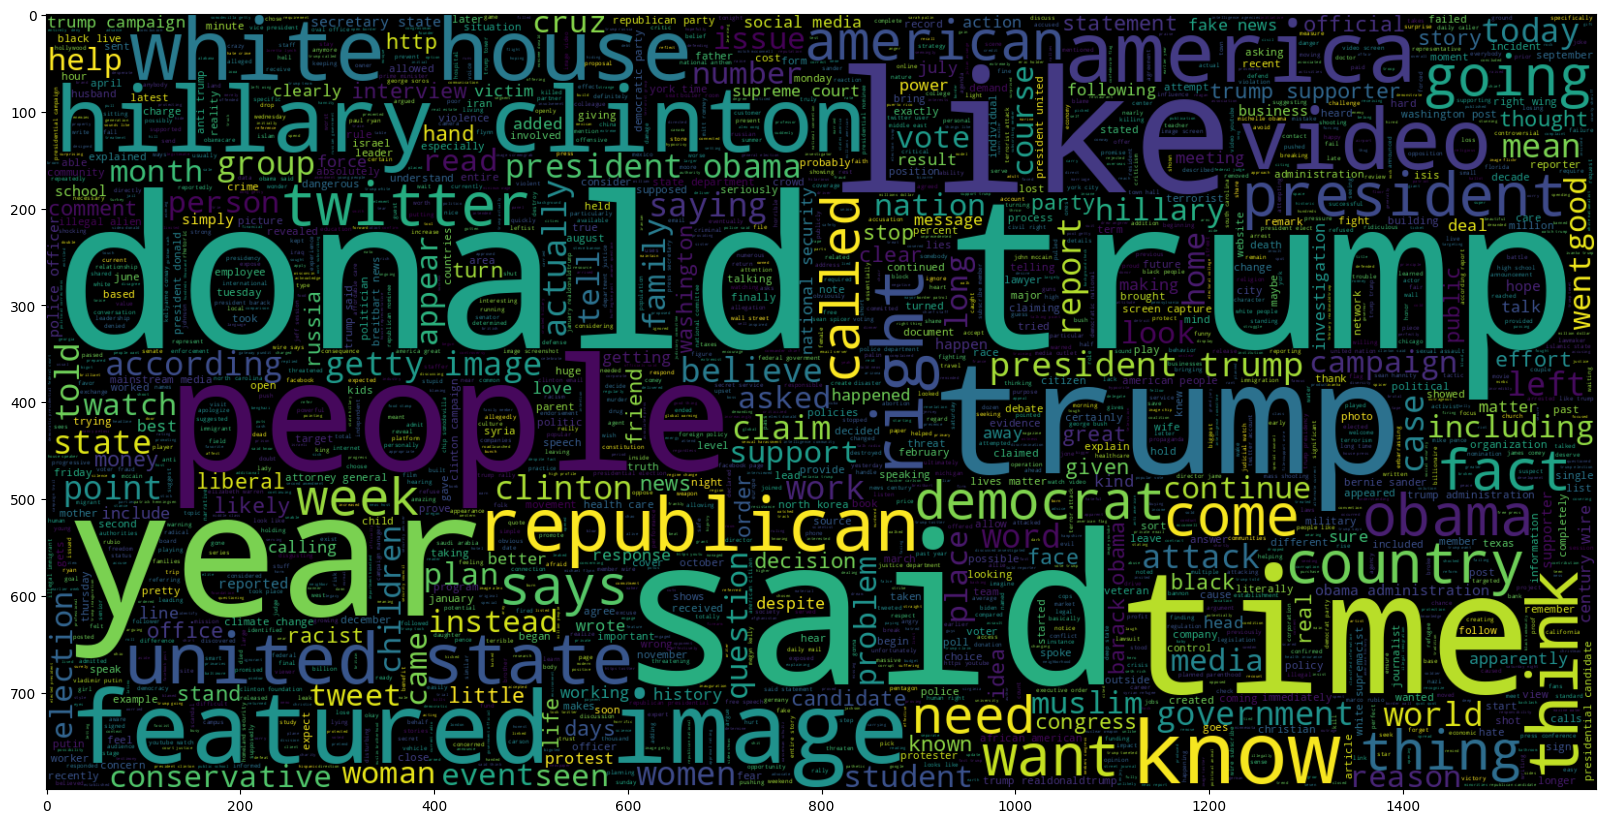

In [70]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.Label == 0].final_news))
plt.imshow(wc, interpolation = 'bilinear')

In [71]:
y = df['Label'].values
X = df.drop(['Label'],axis=1)

In [72]:
y.shape

(44898,)

In [73]:
embedding_glove=f'/glove.6B.50d.txt'
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(embedding_glove) as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [74]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=100)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [75]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 122745 unique tokens.


In [76]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(20000, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, 50))
for word, i in word2idx.items():
  if i < 20000:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [77]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  50,
  weights=[embedding_matrix],
  input_length=100,
  trainable=False
)

In [78]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(100,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

Building model...
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 bidirectional (Bidirection  (None, 100, 30)           7920      
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 30)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 1007951 (3.85 MB)
Trainable p

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,stratify=y, random_state=0)

In [80]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=32,
  epochs=10,
  validation_split=0.2
)

Training model...
Epoch 1/10
898/898 [==============================] - 18s 13ms/step - loss: 0.2528 - accuracy: 0.8983 - val_loss: 0.1610 - val_accuracy: 0.9403
Epoch 2/10
898/898 [==============================] - 11s 12ms/step - loss: 0.1493 - accuracy: 0.9423 - val_loss: 0.1277 - val_accuracy: 0.9531
Epoch 3/10
898/898 [==============================] - 11s 12ms/step - loss: 0.1275 - accuracy: 0.9520 - val_loss: 0.1264 - val_accuracy: 0.9539
Epoch 4/10
898/898 [==============================] - 11s 12ms/step - loss: 0.1085 - accuracy: 0.9605 - val_loss: 0.1207 - val_accuracy: 0.9549
Epoch 5/10
898/898 [==============================] - 11s 12ms/step - loss: 0.1013 - accuracy: 0.9632 - val_loss: 0.1038 - val_accuracy: 0.9605
Epoch 6/10
898/898 [==============================] - 11s 12ms/step - loss: 0.0880 - accuracy: 0.9679 - val_loss: 0.1019 - val_accuracy: 0.9623
Epoch 7/10
898/898 [==============================] - 11s 12ms/step - loss: 0.0891 - accuracy: 0.9674 - val_loss: 0.09

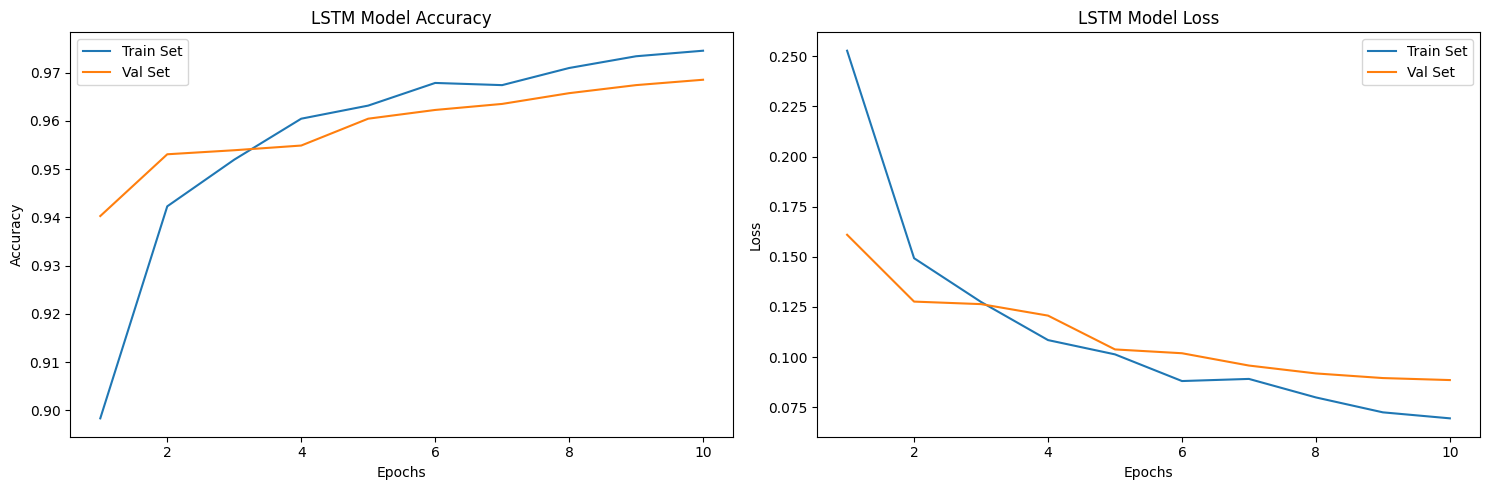

In [81]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1, len(r.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

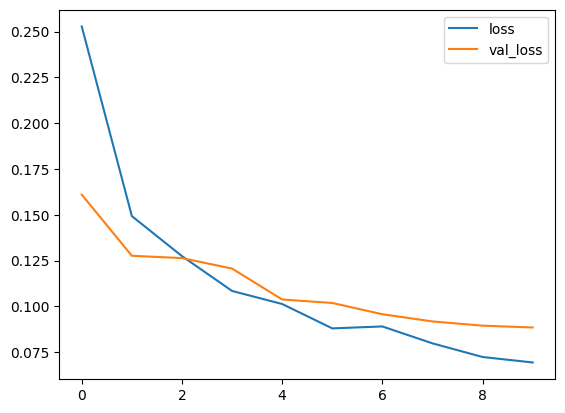

In [82]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

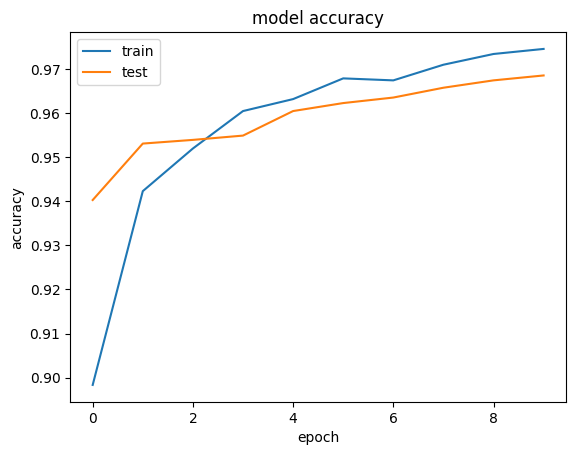

In [83]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

1123/1123 [==============================] - 6s 6ms/step - loss: 0.0670 - accuracy: 0.9767
Accuracy of the model on Training Data is -  97.66690731048584
281/281 [==============================] - 2s 5ms/step - loss: 0.0918 - accuracy: 0.9669
Accuracy of the model on Testing Data is -  96.69265151023865


In [85]:
pred = model.predict(X_test)
pred[:5]

281/281 [==============================] - 2s 5ms/step


array([[7.9213032e-06],
       [6.6834833e-03],
       [9.9960548e-01],
       [8.0576575e-01],
       [3.7417302e-03]], dtype=float32)

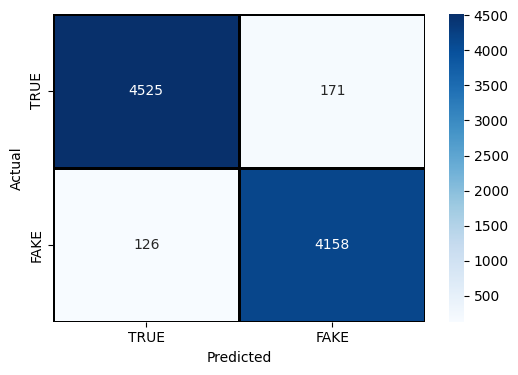

In [86]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [87]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4696
           1       0.96      0.97      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [88]:
testSent =["MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with eclectic bars, art galleries and yoga studios has become a haven from the vigilant eyes of the Belarussian authorities.  This place is like an island,  said Yegor, 21, who works at  popular bar Hooligan.  It s the street of freedom.  The government of President Alexander Lukashenko, who has ruled Belarus for the past 23 years and has boasted that he is  the last and only dictator in Europe  ,has little tolerance for any opposition. A powerful police force and feared state security  keep citizens in check. But police patrols are rare in Oktyabrskaya, partly due to its location on an out-of-the-way peninsula in a bend of the river Svislach. When the first restaurant opened there in 2012, few visitors came but now it ranks among the most fashionable quarters of Minsk.  Such is the growing popularity of that Oktyabrskaya that investors such as Belgazprombank, a subsidiary of state-owned Russian lender Gazprombank, have big plans for the district. Earlier this year the bank purchased part of a factory there and intends to turn it into a gallery, restaurant and theater complex. The manufacturing sector has not entirely abandoned Oktyabrskaya - one  machine-making factory named after the 1917 October Revolution (MZOR) still operates there. Financial difficulties prompted state-owned MZOR to lease or sell some of its facilities to Oktyabrskaya s developers, but the firm still maintains some production with a reduced workforce. Mikhail, who has worked at the factory for 42 years, said he approves of the influx of new  hipster  businesses.  The street has come back to life,  he said. Oktyabrskaya s long-term future ultimately depends on the authorities good favor, cultural analyst Maksim Zhbankov said.  For now they tolerate it. But I can t say that someone won t turn up tomorrow and say they ve decided to tear it all down,  he said. "
,"To confuse and add to the misleading of readers, World News Daily Report mixes some true stories with their fake ones.  Their disclaimer starts with a large headline reading NEWS YOU CAN TRUST however, when you scroll to the bottom of the page, it reads WNDR shall not be responsible for any incorrect or inaccurate information, whether caused by website users or by any of the equipment or programming associated with or utilized in this website or by any technical or human error which may occur.  WNDR assumes however all responsibility for the satirical nature of its articles and for the fictional nature of their content. All characters appearing in the articles in this website – even those based on real people –  are entirely fictional and any resemblance between them and any persons, living, dead, or undead is purely a miracle",
  "MILAN (Reuters) - Italian Interior Minister Marco Minniti met Libyan mayors on Saturday to renew a commitment to fight people trafficking as part of an agreement signed earlier this year between Rome and Tripoli. The meeting, which Libya s interior minister also attended, focused on fostering alternatives to human smuggling and trade in contraband in Libyan towns heavily affected by illegal immigration.  Youngsters in those areas and the whole of Libya deserve a future of hope, free from the threats of criminal organisations...  both sides said in a statement issued by Italy s Interior Ministry. In February, Italy pledged money, training and equipment to help the U.N.-backed Libyan government curb the flow of migrants to Europe. More than 600,000 migrants have reached Italy by sea from North Africa since 2014, most of them from Libya where people smugglers have operated with impunity in the turmoil that followed the fall of Muammar Gaddafi in 2011. "]

In [89]:
def cleanText(txt):
    txt = txt.lower()
    txt = ' '.join([word for word in txt.split() if word not in (stop_words)])
    txt = re.sub('[^a-z]',' ',txt)
    return txt

In [90]:
def predict_text(lst_text):
    test = tokenizer.texts_to_sequences(lst_text)
    # pad sequences so that we get a N x T matrix
    testX = pad_sequences(test, maxlen=100)
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])

    prediction = model.predict(testX)
    df_test['prediction']=prediction
    df_test["test_sent"] = df_test["test_sent"].apply(cleanText)
    df_test['prediction']=df_test['prediction'].apply(lambda x: "Fake" if x<=0.5 else "Real")
    return df_test

In [91]:
df_testsent = predict_text(testSent)
df_testsent

1/1 [==============================] - 0s 22ms/step


,test_sent,prediction
0,minsk reuters shadow disused soviet era fa...,Real
1,confuse add misleading readers world news dai...,Fake
2,milan reuters italian interior minister ma...,Real
